In [ ]:
from google.colab import files
df=files.upload()

Saving Dataset .csv to Dataset .csv


In [ ]:
import pandas as pd
df=pd.read_csv('Dataset .csv')
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [ ]:
df['Has Table booking']=df['Has Table booking'].str.lower()
df['Has Online delivery']=df['Has Online delivery'].str.lower()
df=df.dropna(subset=['Has Table booking'])
df=df.dropna(subset=['Has Online delivery'])
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [ ]:
booking_count=df['Has Table booking'].value_counts()
delivery_count=df['Has Online delivery'].value_counts()
print(booking_count)
print(delivery_count)

Has Table booking
no     7100
yes    2451
Name: count, dtype: int64
Has Online delivery
no     7100
yes    2451
Name: count, dtype: int64


In [ ]:
booking_percentage=df['Has Table booking'].value_counts(normalize=True)*100
delivery_percentage=df['Has Online delivery'].value_counts(normalize=True)*100
print(booking_percentage)
print(delivery_percentage)

Has Table booking
no     74.337766
yes    25.662234
Name: proportion, dtype: float64
Has Online delivery
no     74.337766
yes    25.662234
Name: proportion, dtype: float64


In [ ]:
average_rating=df.groupby('Has Table booking')['Aggregate rating'].mean()
print(average_rating)

Has Table booking
no     2.465296
yes    3.248837
Name: Aggregate rating, dtype: float64


In [ ]:
delivery_price=df.groupby('Currency')['Has Online delivery'].value_counts()
print(delivery_price)

Currency                Has Online delivery
Botswana Pula(P)        no                       22
Brazilian Real(R$)      no                       60
Dollar($)               no                      482
Emirati Diram(AED)      no                       32
                        yes                      28
Indian Rupees(Rs.)      no                     6229
                        yes                    2423
Indonesian Rupiah(IDR)  no                       21
NewZealand($)           no                       40
Pounds(��)              no                       80
Qatari Rial(QR)         no                       20
Rand(R)                 no                       60
Sri Lankan Rupee(LKR)   no                       20
Turkish Lira(TL)        no                       34
Name: count, dtype: int64


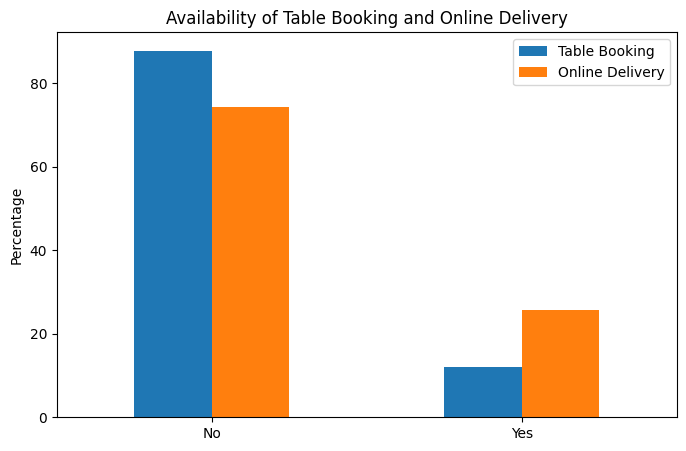

In [ ]:
import matplotlib.pyplot as plt
table_booking_percent = (df['Has Table booking'].value_counts(normalize=True) * 100).round(2)
online_delivery_percent = (df['Has Online delivery'].value_counts(normalize=True) * 100).round(2)
availability = pd.DataFrame({
    'Table Booking': table_booking_percent,
    'Online Delivery': online_delivery_percent
})
availability.plot(kind='bar', figsize=(8,5))
plt.title('Availability of Table Booking and Online Delivery')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()